In [ ]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os
import glob
import matplotlib.patches as mpatches

from monai.data import (
    Dataset,
)

from monai.transforms import (
    Compose,
    LoadImaged,
)

import pandas as pd
import collections
from met_brewer import met_brew
from tqdm import tqdm

%matplotlib inline

In [ ]:
transforms = Compose(
            [
                LoadImaged(keys=["image", "label"]),
                ]
)

In [16]:
data_dir = "/data/Dataset060_Merged_Def/"
train_images = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "amos*.nii.gz")))
train_labels = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "amos*.nii.gz")))

data_dicts = [{"image": image_name, "label": label_name} for image_name, label_name in zip(train_images, train_labels)]

amos = Dataset(
    data=data_dicts,
    transform=transforms,
)

## Data Analysis

In [3]:
metadata = pd.read_csv('amos_metadata_def.csv')

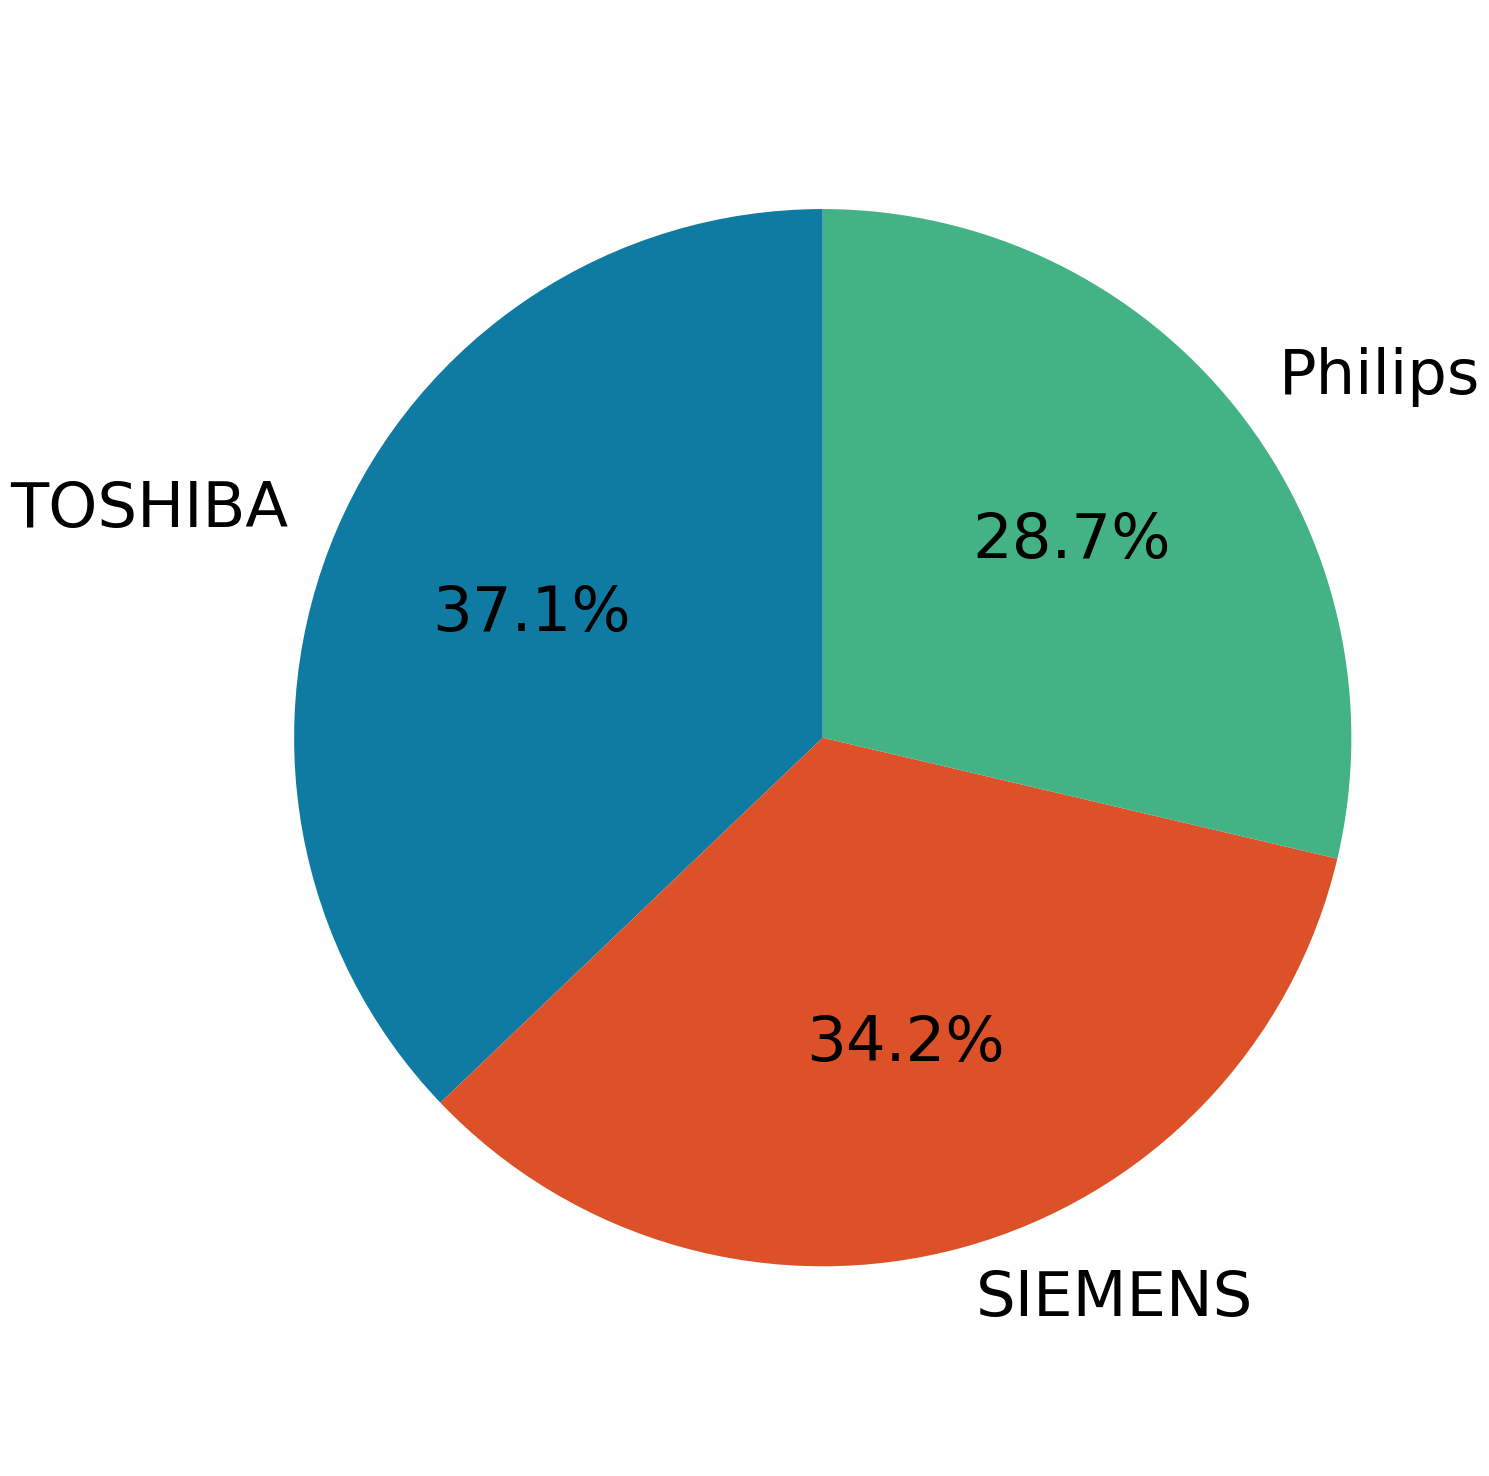

In [14]:
counts = dict(metadata["Manufacturer"].value_counts())

colors = met_brew(name="Egypt", n=len(counts), brew_type="colorblind")

colors = [colors[1], colors[0], colors[2]]

plt.figure(figsize=(15, 15))
_, labels, pie = plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', pctdistance=0.6, colors=colors, startangle=90, textprops={'weight':'normal', 'fontsize': 45})

plt.setp(pie, **{'weight':'normal', 'fontsize':45})
plt.axis('equal')
plt.tight_layout()

plt.show()

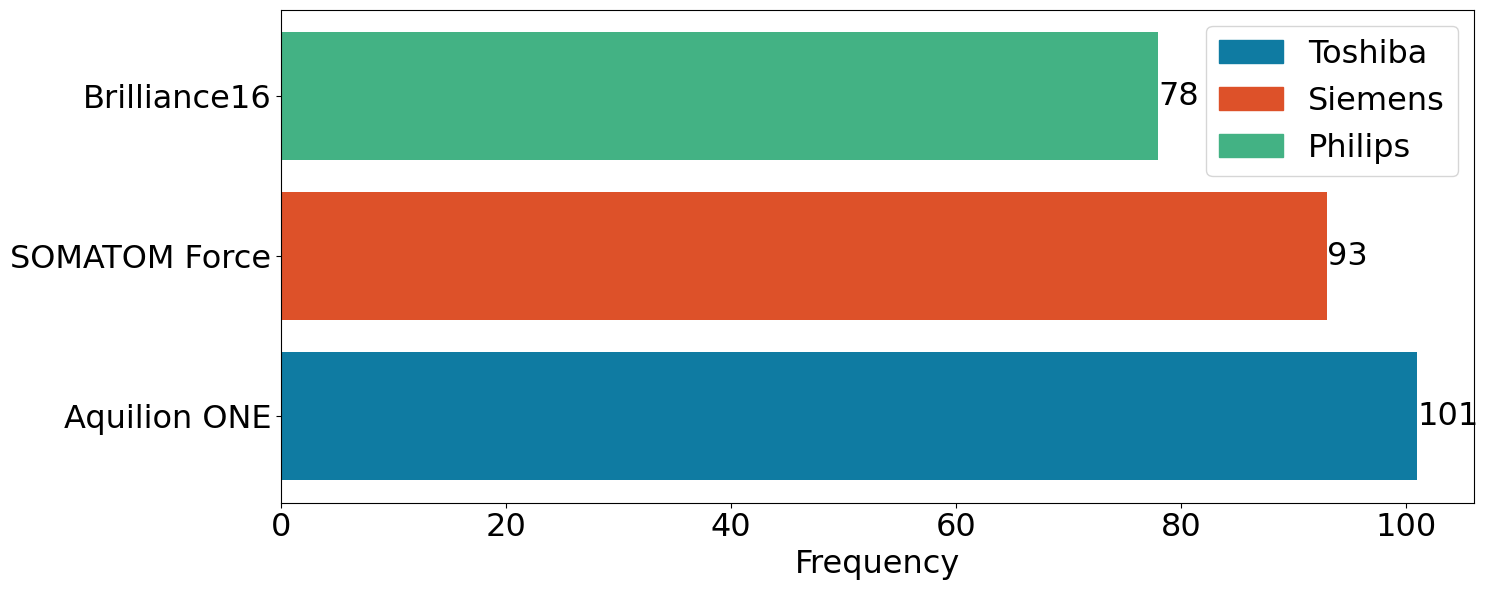

In [27]:
counts = dict(metadata["Manufacturer's Model Name"].value_counts())

fontsize = 23
colors = met_brew(name="Egypt", n=len(counts), brew_type="colorblind")

colors = [colors[1], colors[0], colors[2]]

plt.figure(figsize=(15, 6))
bars = plt.barh(width=counts.values(), y=list(counts.keys()), color=colors)

legend_handles = [mpatches.Patch(color=colors[0], label='Toshiba'),
                  mpatches.Patch(color=colors[1], label='Siemens'),
                  mpatches.Patch(color=colors[2], label='Philips'),
                 ]

plt.bar_label(bars, fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Frequency', fontsize=fontsize)
plt.legend(handles=legend_handles, fontsize=fontsize)
plt.tight_layout()

plt.show()